# Lab Exercise 7: Optical Flow Estimation 
•	Objective: Estimate optical flow between consecutive frames. 

•	Task: Implement optical flow algorithms (Horn-Schunck or Lucas-Kanade) to track the movement of objects between two consecutive frames in a video. 


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

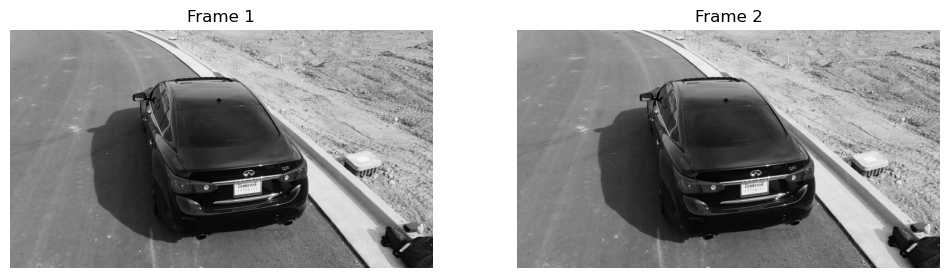

In [7]:
# Open the video file
cap = cv2.VideoCapture("car_video.mp4")

# Read the first two frames
ret, frame1 = cap.read()
ret, frame2 = cap.read()

# Convert frames to grayscale for optical flow calculation
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Display the frames
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.title("Frame 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.title("Frame 2")
plt.axis('off')
plt.show()


In [3]:
# Set parameters for Lucas-Kanade optical flow
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Detect good features to track in the first frame
features = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Calculate optical flow
next_points, status, error = cv2.calcOpticalFlowPyrLK(gray1, gray2, features, None, **lk_params)

# Select points where flow was found
good_old = features[status == 1]
good_new = next_points[status == 1]


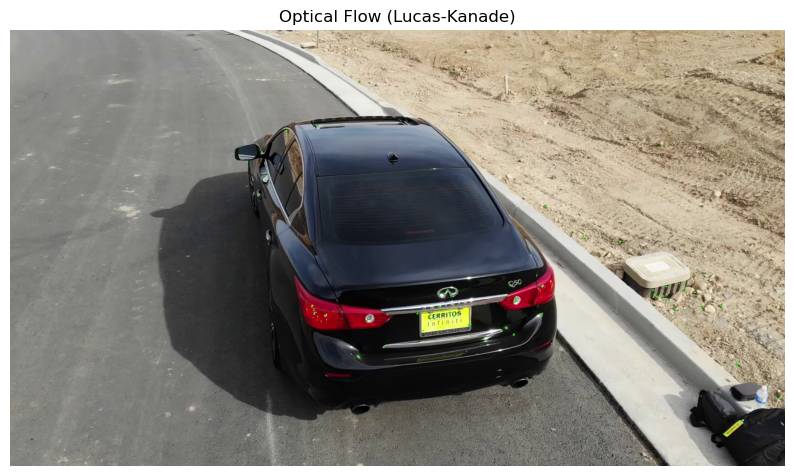

In [4]:
# Create a copy of the second frame to visualize flow
flow_visualization = frame2.copy()

# Draw the optical flow vectors
for i, (new, old) in enumerate(zip(good_new, good_old)):
    x_new, y_new = new.ravel()
    x_old, y_old = old.ravel()
    flow_visualization = cv2.arrowedLine(flow_visualization, (int(x_old), int(y_old)), (int(x_new), int(y_new)),
                                         (0, 255, 0), 2, tipLength=0.3)

# Display the optical flow visualization
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(flow_visualization, cv2.COLOR_BGR2RGB))
plt.title("Optical Flow (Lucas-Kanade)")
plt.axis('off')
plt.show()


In [9]:
# Parameters for ShiTomasi corner detection
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Parameters for Lucas-Kanade optical flow
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))



# Read the first frame and convert it to grayscale
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

# Detect initial points to track
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# Create a mask for drawing flow vectors
mask = np.zeros_like(old_frame)

while cap.isOpened():
    # Read the next frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow using Lucas-Kanade
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    
    # Select good points
    if p1 is not None and p0 is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # Draw the tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, (0, 0, 255), -1)
        
        # Overlay the flow vectors on the frame
        img = cv2.add(frame, mask)

        # Display the frame
        cv2.imshow('Optical Flow Tracking', img)

        # Press 'q' to exit the video window
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    # Update previous frame and points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

# Release the video capture object
cap.release()
cv2.destroyAllWindows()


# Lab Exercise 7: Optical Flow Estimation

## Objective
The purpose of this lab is to implement optical flow estimation to track object movement between consecutive frames in a video. This is achieved by applying the Lucas-Kanade optical flow algorithm.

## Steps and Methods

1. **Video Loading**:
   - The video file is loaded, and frames are processed in sequence to observe object motion over time.

2. **Feature Detection (Shi-Tomasi)**:
   - Key points in the initial frame are detected using Shi-Tomasi corner detection. These points serve as reference points for tracking.

3. **Optical Flow Calculation (Lucas-Kanade)**:
   - The Lucas-Kanade method is applied to calculate the motion of these key points in each subsequent frame.
   - Optical flow vectors are generated between corresponding points in consecutive frames, indicating movement.

4. **Visualization**:
   - Motion vectors are overlaid on each frame. Green lines show the direction and magnitude of movement, while red circles indicate the current positions of the tracked points.
   - The frames are displayed as a video, providing a real-time view of object tracking.

## Results
- The optical flow visualization highlights the movement of tracked points between frames.
- The overlay of flow vectors effectively demonstrates object motion and direction within the video.

## Conclusion
This exercise illustrates how optical flow can track object movement in video sequences, a fundamental technique in motion analysis and video surveillance. By following detected features over time, the Lucas-Kanade method efficiently estimates motion, making it a valuable tool in computer vision for dynamic scenes.

---

### Notes
For optimal results, this method requires videos with sufficient texture for feature detection. Adjusting parameters such as the number of corners and window size for Lucas-Kanade can improve tracking performance based on video content.
